# 模型评估

## 读取数据

In [1]:
import pandas as pd

# 读取数据
data = pd.read_csv('../data/processed/data_dopants.csv')
data_encoded = pd.get_dummies(data, columns=['Electrolyte', 'Current collector'])
data_encoded = data_encoded.drop('Index', axis=1)

data_encoded

,O,N,Specific surface area,Pore volume,Rmic/mes,ID/IG,Active mass loading,Potential window,Current density,target,...,Electrolyte_3M Zn(CF3SO3)2,Current collector_Nickel foam,Current collector_Titanium foil,Current collector_carbon cloth,Current collector_freestanding,Current collector_graphite paper,Current collector_nickel foam,Current collector_stainless steel,Current collector_stainless-steel foil,Current collector_stainless-steel mesh
0,7.15,3.52,1546.1,0.5753,14.558000,1.029,1.0,1.6,0.10,85.0,...,False,False,False,True,False,False,False,False,False,False
1,8.12,3.79,1315.2,0.5116,9.330000,1.038,1.0,1.6,0.10,114.0,...,False,False,False,True,False,False,False,False,False,False
2,21.55,3.29,1140.8,0.8600,0.157000,0.820,2.5,1.8,0.10,90.2,...,False,False,False,False,False,False,False,False,False,True
3,21.55,3.29,1140.8,0.8600,0.157000,0.820,2.5,1.8,0.25,86.3,...,False,False,False,False,False,False,False,False,False,True
4,21.55,3.29,1140.8,0.8600,0.157000,0.820,2.5,1.8,0.50,79.9,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,6.93,1.98,3415.3,2.4820,0.190408,2.820,1.0,1.6,5.00,134.0,...,False,False,False,False,False,False,False,False,False,True
640,6.93,1.98,3415.3,2.4820,0.190408,2.820,1.0,1.6,10.00,125.7,...,False,False,False,False,False,False,False,False,False,True
641,6.93,1.98,3415.3,2.4820,0.190408,2.820,1.0,1.6,20.00,118.9,...,False,False,False,False,False,False,False,False,False,True
642,6.93,1.98,3415.3,2.4820,0.190408,2.820,1.0,1.6,30.00,114.5,...,False,False,False,False,False,False,False,False,False,True


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 将目标值分成10个等级
data_encoded['target_class'] = pd.qcut(data_encoded['target'], q=10, labels=False)
X = data_encoded.drop(['target', 'target_class'], axis=1)
y = data_encoded['target']
stratify_column = data_encoded['target_class']

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 拆分训练和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=stratify_column)

## 1. 核岭回归（Kernel Ridge Regression）

  Metric  Train Set   Test Set
0     R2   0.779018   0.667525
1    MAE  13.909409  17.502975
2   MAPE  17.367562  23.627244
3   RMSE  19.019596  23.879466


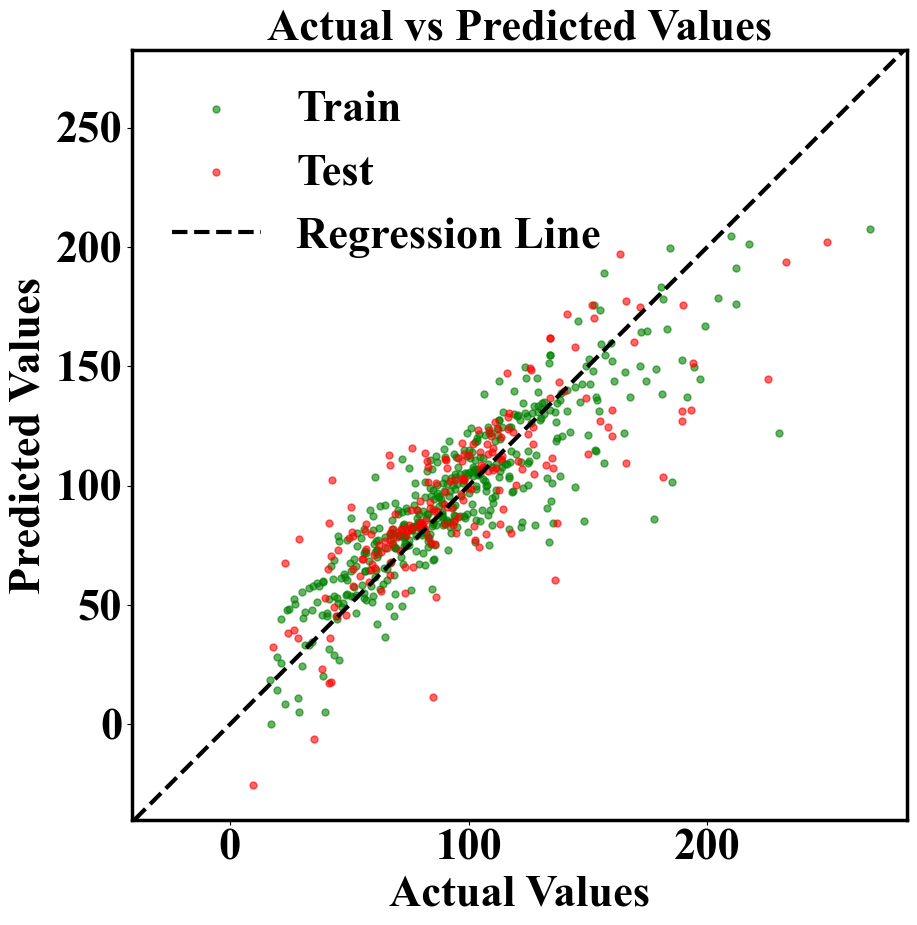

In [3]:
from sklearn.kernel_ridge import KernelRidge
from src.models import train_evaluate, plot_actual_vs_predicted

# 初始化模型
krr = KernelRidge(alpha=0.8,
                  gamma=0.1,
                  kernel='polynomial',
                  degree=2,
                  coef0=7.7)

# 训练模型
krr.fit(X_train, y_train)

# 预测
y_pred = krr.predict(X_test)

# 评估
results = train_evaluate(krr, X_train, y_train, X_test, y_test)
print(results)

# Plot the actual vs predicted values
plot_actual_vs_predicted(y_train, krr.predict(X_train), 
                         y_test, krr.predict(X_test), 
                         '../reports/figures/model evaluation/krr.png')